ETAPA 4 - RODAR RE - TEM QUE ATUALIZAR O PASSO A PASSO


Caderno resposável por extrair as NER dos textos anotados
Passo a passo
1 - Recuperar as NER anotadas nos textos pelo programa de anotação
1.1 - Tags de configuração que estão no item 2.1:
train = "/content/drive/MyDrive/Doutorado/IDEA/dataset_doccano/outputs/exporta_anotacao-train-k0.spacy"

dev = "/content/drive/MyDrive/Doutorado/IDEA/dataset_doccano/outputs/exporta_anotacao-dev-k0.spacy"

2 - Instanciar o modelo de IA de acordo com os hiperparâmetros.
2.1 - Arquivo de configuração dos hiperparâmetros: /content/drive/MyDrive/Doutorado/IDEA/NER/config_spacy.cfg
3 - Rodar o modelo de aprendizado e avaliar a precisão, a taxa de perda e a acurácia.
4 - Conforme os resultados de avaliação do modelo, gerar as NER aprendidas.
4.1 - Local onde o modelo é gerado: /content/drive/MyDrive/Doutorado/IDEA/NER/outputs
Data: 18-05-2023
Autores: Maj Giselle Farias e Jones.

https://towardsdatascience.com/how-to-train-a-joint-entities-and-relation-extraction-classifier-using-bert-transformer-with-spacy-49eb08d91b5c

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Sep 17 13:35:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   38C    P8             12W /   72W |       0MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
#@title RAM
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 56.9 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
#CPU
!lscpu

Architecture:             x86_64
  CPU op-mode(s):         32-bit, 64-bit
  Address sizes:          46 bits physical, 48 bits virtual
  Byte Order:             Little Endian
CPU(s):                   12
  On-line CPU(s) list:    0-11
Vendor ID:                GenuineIntel
  Model name:             Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:           6
    Model:                85
    Thread(s) per core:   2
    Core(s) per socket:   6
    Socket(s):            1
    Stepping:             7
    BogoMIPS:             4400.44
    Flags:                fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge m
                          ca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht sysc
                          all nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xt
                          opology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq
                           ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt
                           aes xsave avx f16c rdrand hyperviso

In [ ]:
# verificar a GPU e TPU ativa
import tensorflow as tf
print("GPU:", tf.config.list_physical_devices('GPU'))
print("TPU:", tf.config.list_logical_devices('TPU'))

GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TPU: []


In [ ]:
# Disco rígido
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         236G   38G  199G  16% /
tmpfs            64M     0   64M   0% /dev
shm              26G     0   26G   0% /dev/shm
/dev/root       2.0G  1.2G  775M  61% /usr/sbin/docker-init
/dev/nvme0n1p1  242G   67G  176G  28% /opt/bin/.nvidia
tmpfs            27G   60K   27G   1% /var/colab
tmpfs            27G     0   27G   0% /proc/acpi
tmpfs            27G     0   27G   0% /proc/scsi
tmpfs            27G     0   27G   0% /sys/firmware
drive           100G   44G   57G  44% /content/drive


In [ ]:
# ambiente completo
import os
import platform
import tensorflow as tf
import psutil
import subprocess

def run_cmd(cmd):
    return subprocess.getoutput(cmd)

print("="*30, "AMBIENTE DO GOOGLE COLAB", "="*30)

# Sistema operacional
print("\n🖥️ Sistema Operacional:")
print(run_cmd("cat /etc/os-release | grep PRETTY_NAME"))

# CPU
print("\n🧠 CPU:")
print(run_cmd("lscpu | grep 'Model name'"))
print(f"Núcleos (lógicos): {psutil.cpu_count(logical=True)}")
print(f"Núcleos (físicos): {psutil.cpu_count(logical=False)}")

# Memória RAM
print("\n💾 Memória RAM:")
ram = psutil.virtual_memory()
print(f"Total: {round(ram.total / 1e+9, 2)} GB")

# GPU
print("\n🎮 GPU:")
gpu_info = run_cmd("nvidia-smi")
if "NVIDIA" in gpu_info:
    print(gpu_info)
else:
    print("Nenhuma GPU detectada.")

# TPU
print("\n⚡ TPU:")
try:
    tpus = tf.config.list_logical_devices('TPU')
    if tpus:
        print("TPU disponível:", tpus)
    else:
        print("Nenhuma TPU detectada.")
except:
    print("TensorFlow não conseguiu verificar TPU.")

# Disco
print("\n🗃️ Espaço em Disco:")
print(run_cmd("df -h /"))

print("\n✅ Ambiente analisado com sucesso.")


============================== AMBIENTE DO GOOGLE COLAB ==============================

🖥️ Sistema Operacional:
PRETTY_NAME="Ubuntu 22.04.4 LTS"

🧠 CPU:
Model name:                           Intel(R) Xeon(R) CPU @ 2.20GHz
Núcleos (lógicos): 12
Núcleos (físicos): 6

💾 Memória RAM:
Total: 56.87 GB

🎮 GPU:
Thu Jun 12 17:38:45 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4   

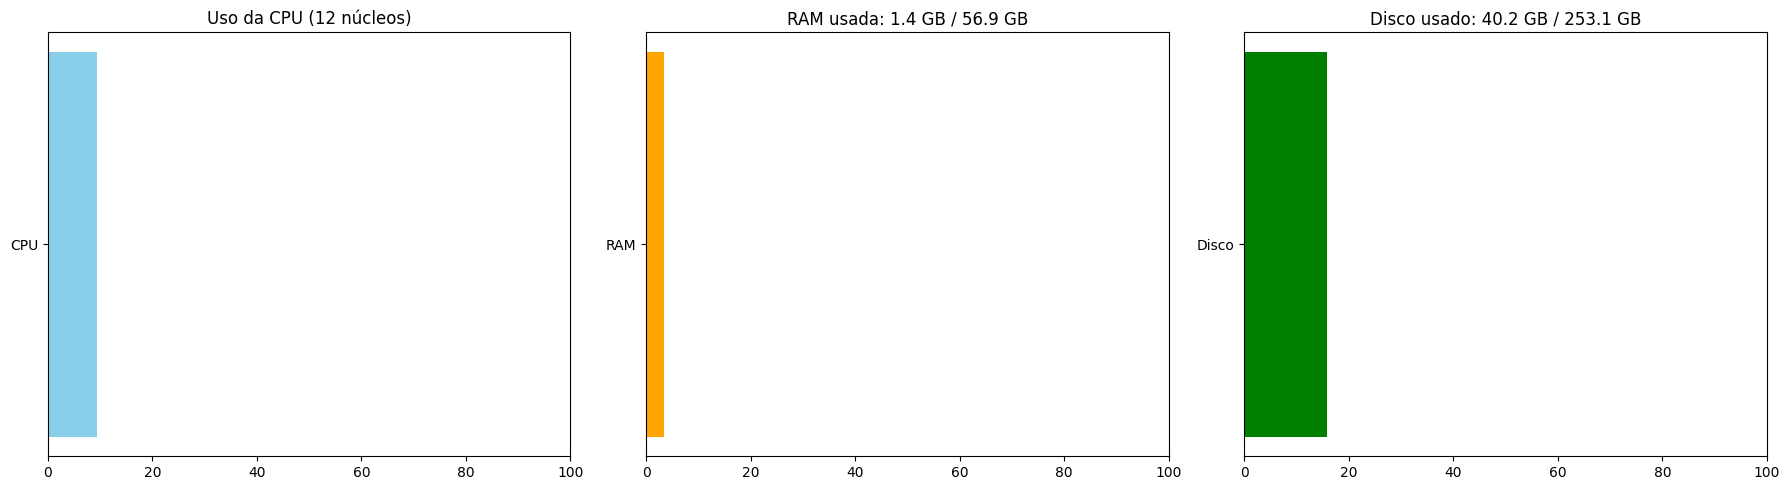

🎮 GPU:
Thu Jun 12 17:42:27 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   47C    P0             28W /   72W |     189MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+----------------------------------------

In [ ]:
import psutil
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
import subprocess

def run_cmd(cmd):
    return subprocess.getoutput(cmd)

# CPU
cpu_percent = psutil.cpu_percent(interval=1)
cpu_count = psutil.cpu_count(logical=True)

# RAM
ram = psutil.virtual_memory()
ram_total = ram.total / 1e+9
ram_used = ram.used / 1e+9
ram_percent = ram.percent

# Disco
disk = shutil.disk_usage('/')
disk_total = disk.total / 1e+9
disk_used = disk.used / 1e+9
disk_percent = (disk.used / disk.total) * 100

# GPU
gpu_info = run_cmd("nvidia-smi") if shutil.which("nvidia-smi") else "Nenhuma GPU detectada."

# TPU
try:
    tpus = tf.config.list_logical_devices('TPU')
    tpu_status = "Disponível" if tpus else "Não detectada"
except:
    tpu_status = "Erro ao verificar TPU"

# Visualização com matplotlib
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# CPU
axs[0].barh(["CPU"], [cpu_percent], color='skyblue')
axs[0].set_xlim(0, 100)
axs[0].set_title(f'Uso da CPU ({cpu_count} núcleos)')

# RAM
axs[1].barh(["RAM"], [ram_percent], color='orange')
axs[1].set_xlim(0, 100)
axs[1].set_title(f'RAM usada: {ram_used:.1f} GB / {ram_total:.1f} GB')

# Disco
axs[2].barh(["Disco"], [disk_percent], color='green')
axs[2].set_xlim(0, 100)
axs[2].set_title(f'Disco usado: {disk_used:.1f} GB / {disk_total:.1f} GB')

plt.tight_layout()
plt.show()

# Informações extras
print("🎮 GPU:")
print(gpu_info)
print("\n⚡ TPU:", tpu_status)


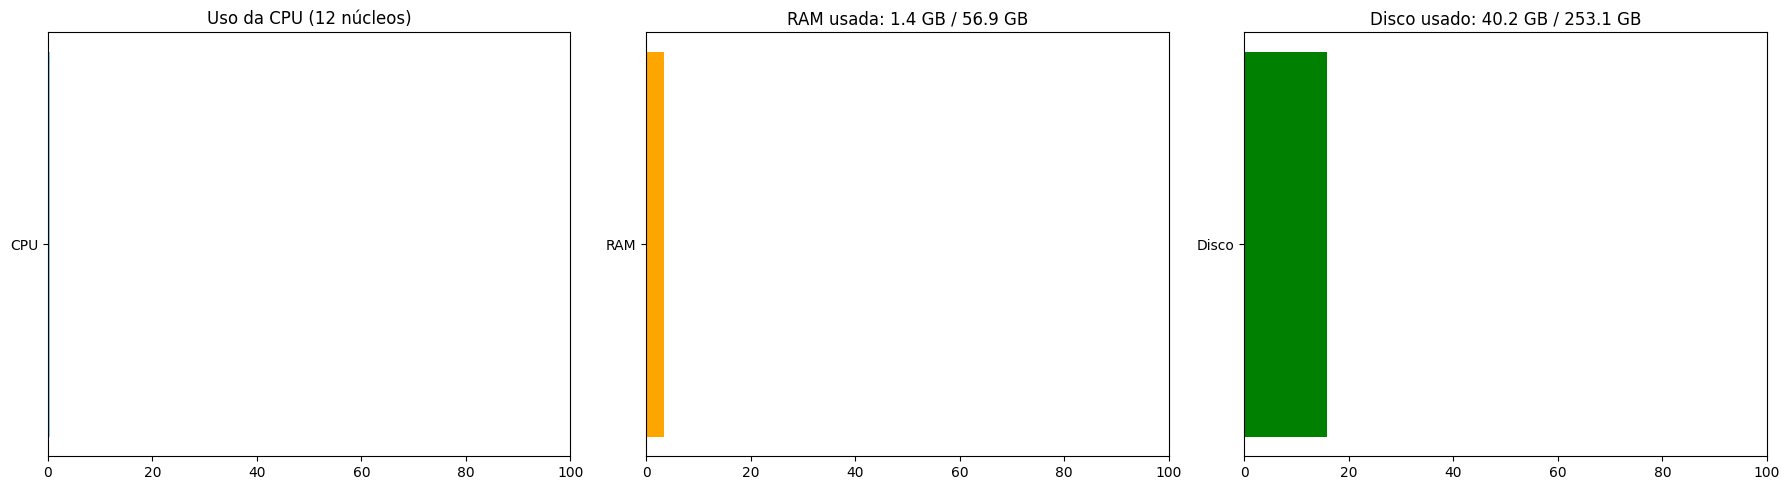

In [ ]:
import psutil
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
import subprocess
from datetime import datetime

def run_cmd(cmd):
    return subprocess.getoutput(cmd)

# Coleta de dados
cpu_percent = psutil.cpu_percent(interval=1)
cpu_count = psutil.cpu_count(logical=True)

ram = psutil.virtual_memory()
ram_total = ram.total / 1e+9
ram_used = ram.used / 1e+9
ram_percent = ram.percent

disk = shutil.disk_usage('/')
disk_total = disk.total / 1e+9
disk_used = disk.used / 1e+9
disk_percent = (disk.used / disk.total) * 100

gpu_info = run_cmd("nvidia-smi") if shutil.which("nvidia-smi") else "Nenhuma GPU detectada."
try:
    tpus = tf.config.list_logical_devices('TPU')
    tpu_status = "Disponível" if tpus else "Não detectada"
except:
    tpu_status = "Erro ao verificar TPU"

# Geração do gráfico
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# CPU
axs[0].barh(["CPU"], [cpu_percent], color='skyblue')
axs[0].set_xlim(0, 100)
axs[0].set_title(f'Uso da CPU ({cpu_count} núcleos)')

# RAM
axs[1].barh(["RAM"], [ram_percent], color='orange')
axs[1].set_xlim(0, 100)
axs[1].set_title(f'RAM usada: {ram_used:.1f} GB / {ram_total:.1f} GB')

# Disco
axs[2].barh(["Disco"], [disk_percent], color='green')
axs[2].set_xlim(0, 100)
axs[2].set_title(f'Disco usado: {disk_used:.1f} GB / {disk_total:.1f} GB')

plt.tight_layout()

# Salvando como im


In [ ]:
!pip install -U spacy

In [ ]:
#!pip install -U pip setuptools wheel

In [ ]:
cd /content/drive/MyDrive/Doutorado/IDEA/RE

/content/drive/MyDrive/Doutorado/IDEA/RE


In [ ]:
!python -m spacy project clone tutorials/rel_component


✘ Can't clone project, directory already exists:
/content/drive/MyDrive/Doutorado/IDEA/RE/rel_component



In [ ]:
# ********************************************************************
# TEM QUE ESCOLHER BASE OU LARGE
#*********************************************************************
# para utilizar o BERT Base
#!python -m spacy download pt_core_news_sm

# para utilizar o BERT Base
!python -m spacy download pt_core_news_md

# para utilizar o BERT Large
#!python -m spacy download pt_core_news_lg

# para utilizar o BERT em Inglês Base
#!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 81.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!pip install -U spacy transformers

In [ ]:
cd rel_component

/content/drive/MyDrive/Doutorado/IDEA/RE/rel_component


Create a folder with the name “data” inside rel_component and upload the training, dev and test binary files into it.

Open project.yml file and update the training, dev and test path:
> train_file: "data/relations_training.spacy"

> dev_file: "data/relations_dev.spacy"

> test_file: "data/relations_test.spacy"

In [ ]:
!pip install spacy-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 795.8/795.8 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.4/313.4 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 138.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 114.6 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.22.0
    Uninstalling tokenizers-0.22.0:
      Successfully uninstalled tokenizers-0.22.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.56.1
    Uninstalling transformers-4.56.1:
      Successfully uninstalled transformers-4.56.1


In [ ]:
# tentando resolver o problema de out of memory
# limpar o cache
import torch
torch.cuda.empty_cache()

In [ ]:
!spacy project run train_gpu # command to train train transformers


================================= train_gpu =================================
Running command: /usr/bin/python3 -m spacy train configs/rel_trf.cfg --output training --paths.train /content/drive/MyDrive/Doutorado/IDEA/dataset_doccano/outputs/exporta_anotacao-train0.spacy --paths.dev /content/drive/MyDrive/Doutorado/IDEA/dataset_doccano/outputs/exporta_anotacao-dev0.spacy -c ./scripts/custom_functions.py --gpu-id 0
ℹ Saving to output directory: training
ℹ Using GPU: 0

=========================== Initializing pipeline ===========================
tokenizer_config.json: 100% 43.0/43.0 [00:00<00:00, 414kB/s]
config.json: 100% 647/647 [00:00<00:00, 6.78MB/s]
vocab.txt: 210kB [00:00, 11.7MB/s]
added_tokens.json: 100% 2.00/2.00 [00:00<00:00, 24.4kB/s]
special_tokens_map.json: 100% 112/112 [00:00<00:00, 1.34MB/s]
2025-09-17 13:37:30.495657: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off error

The model will be saved in a folder named “training” along with the scores of our model.

In [ ]:
!spacy project run evaluate # command to evaluate on test dataset


================================== evaluate ==================================
Running command: /usr/bin/python3 ./scripts/evaluate.py training/model-best /content/drive/MyDrive/Doutorado/IDEA/dataset_doccano/outputs/exporta_anotacao-test.spacy False
2025-09-17 14:50:48.427192: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-17 14:50:48.444968: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758120648.466432   20961 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758120648.472946   20961 cuda_blas.cc:1407] Unable to re

In [ ]:
def get_cleaned_label(label: str):
    if "-" in label:
        return label.split("-")[1]
    else:
        return label


def create_target_vector(doc):
    return [get_cleaned_label(label[2]) for label in doc[1]["relations"]]


def create_total_target_vector(docs):
    target_vector = []
    for doc in docs:
        target_vector.extend(create_target_vector(doc))
    return target_vector

In [ ]:
from spacy.training import offsets_to_biluo_tags

def create_prediction_vector(text):
    return [get_cleaned_label(prediction) for prediction in get_all_ner_predictions(text)]


def create_total_prediction_vector(docs: list):
    prediction_vector = []
    for doc in docs:
        prediction_vector.extend(create_prediction_vector(doc[0]))
    return prediction_vector

def get_all_ner_predictions(text):
    doc = nlp(text)
    entities = [(e.start_char, e.end_char, e.label_) for e in doc.rels]
    bilou_entities = biluo_tags_from_offsets(doc, relations)
    return bilou_entities

In [ ]:
from sklearn.metrics import confusion_matrix

def generate_confusion_matrix(docs):
    classes = sorted(set(create_total_target_vector(docs)))
    y_true = create_total_target_vector(docs)
    y_pred = create_total_prediction_vector(docs)

    return confusion_matrix(y_true, y_pred, classes)

In [ ]:
generate_confusion_matrix

<function __main__.generate_confusion_matrix(docs)>

Note: Make sure to copy rel_pipe and rel_model from the scripts folder into your main folder (copiar pro computador, onde vou rodar o modelo)